**Names of everyone present in your group:**

Zachary Qian and Chris Conatzer (Group 22)

___

# Group project: learning a penguin's species

The aim of this activity is to use machine learning to build a decision tree model that predicts a penguin's species from its features.

Let's begin by importing all the libraries we'll need, and by downloading the penguins dataset:

In [1]:
import urllib
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree, preprocessing
import numpy as np

In [2]:
url = 'https://philchodrow.github.io/PIC16A/content/IO_and_modules/IO/palmer_penguins.csv'
filedata = urllib.request.urlopen(url)
with open('penguins.csv', 'wb') as f:
    f.write(filedata.read())

Make the `penguins` dataframe from the downloaded `csv` file. Keep only the following columns: "Species", "Flipper Length (mm)", "Body Mass (g)", "Sex". (Use the square brackets operator on the list of these strings, and assign the result back to `penguins`.)

In [10]:
penguins = pd.read_csv('penguins.csv')[["Species","Flipper Length (mm)","Body Mass (g)","Sex"]]
#penguins = penguins[]

Run the next cell to look at your dataframe. You should have 344 rows and 4 columns.

In [12]:
penguins

,Species,Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),181.0,3750.0,MALE
1,Adelie Penguin (Pygoscelis adeliae),186.0,3800.0,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),195.0,3250.0,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),193.0,3450.0,FEMALE
...,...,...,...,...
339,Gentoo penguin (Pygoscelis papua),NaN,NaN,NaN
340,Gentoo penguin (Pygoscelis papua),215.0,4850.0,FEMALE
341,Gentoo penguin (Pygoscelis papua),222.0,5750.0,MALE
342,Gentoo penguin (Pygoscelis papua),212.0,5200.0,FEMALE


### §1. Preparing your data

You might have noticed that your dataframe contains rows with `NaN` values. Calling `.dropna()` on the dataframe will remove these rows. Do this below, and reassign the result back to `penguins`.

In [13]:
penguins = penguins.dropna()

Look at your dataframe once again. You should have 334 rows and 4 columns.

In [17]:
penguins

,Species,Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),181.0,3750.0,MALE
1,Adelie Penguin (Pygoscelis adeliae),186.0,3800.0,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),195.0,3250.0,FEMALE
4,Adelie Penguin (Pygoscelis adeliae),193.0,3450.0,FEMALE
5,Adelie Penguin (Pygoscelis adeliae),190.0,3650.0,MALE
...,...,...,...,...
338,Gentoo penguin (Pygoscelis papua),214.0,4925.0,FEMALE
340,Gentoo penguin (Pygoscelis papua),215.0,4850.0,FEMALE
341,Gentoo penguin (Pygoscelis papua),222.0,5750.0,MALE
342,Gentoo penguin (Pygoscelis papua),212.0,5200.0,FEMALE


Run the next cell. Doing this will make sure that the random values that your code will generate will be the same every time you run the code.

In [16]:
np.random.seed(1000)

Our goal is to build a model that predicts the species of a penguin based on the other features that you now have in the `penguins` dataframe. With this in mind, split your dataframe into `X` and `y` (predictor variables and target variable). Then split `X` and `y` into training and test data (80/20% of the rows).

In [22]:
# Use the names X_train, X_test, y_train, y_test in your code
import sklearn
from sklearn.model_selection import train_test_split
X = penguins.drop("Species",axis=1)
y = penguins.Species

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1000)


In [25]:
#X_test.shape

Make a `clean_data` function to clean up your data. The function should take `X` and `y` -- you will be calling it on both the training and the test data separately. Your function should:

- make copies of the given inputs using the `.copy()` method

- encode the sex and the species of the penguins as integers

- return three elements: two `numpy` arrays containing the data from `X` and `y` respectively, and the names of the columns of `X`

In [26]:
from sklearn import preprocessing
def clean_data(X, y):
    X.copy()
    y.copy()
    le = preprocessing.LabelEncoder()
    X["Sex"] = le.fit_transform(X["Sex"])
    
    return X,y, X.columns
    # your code here
    pass

Now run the following cell.

In [27]:
X_train, y_train, labels = clean_data(X_train, y_train)
X_test, y_test, labels = clean_data(X_test, y_test)

<ipython-input-26-248201e9b1ca>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Sex"] = le.fit_transform(X["Sex"])


To make sure that you understand what is going on, observe the output of the following:

In [28]:
print(X_train, y_train, labels)

     Flipper Length (mm)  Body Mass (g)  Sex
48                 190.0         3450.0    1
311                228.0         5400.0    2
340                215.0         4850.0    1
310                218.0         4950.0    1
160                195.0         4150.0    1
..                   ...            ...  ...
264                222.0         5550.0    2
258                208.0         4350.0    1
198                190.0         3400.0    1
77                 184.0         3900.0    2
93                 186.0         4450.0    2

[267 rows x 3 columns] 48           Adelie Penguin (Pygoscelis adeliae)
311            Gentoo penguin (Pygoscelis papua)
340            Gentoo penguin (Pygoscelis papua)
310            Gentoo penguin (Pygoscelis papua)
160    Chinstrap penguin (Pygoscelis antarctica)
                         ...                    
264            Gentoo penguin (Pygoscelis papua)
258            Gentoo penguin (Pygoscelis papua)
198    Chinstrap penguin (Pygoscelis antarct

### §2. Training a model

Using the training data you generated in the previous part, train a decision tree classification model `T` with a `max_depth` value of 20. Score your model **against the training data**. Then score your model again, this time **against the test data**. Print both scores and observe the output.

In [39]:
import sklearn

T = sklearn.tree.DecisionTreeClassifier(max_depth= 20)
T.fit(X_train, y_train)
print("Score for Test is: ", T.score(X_test,y_test))
print("Score for Train is: ", T.score(X_train,y_train))

Score for Test is:  0.746268656716418
Score for Train is:  0.9700374531835206


Again, using the training data you generated in the previous part, train another model, also named `T`. This time, use a `max_depth` value of 3. Just as above, score your model **against the training data**, and again **against the test data**. Print both scores and observe the output.

In [40]:
T = sklearn.tree.DecisionTreeClassifier(max_depth= 3)
T.fit(X_train, y_train)
print("Score for Test is: ", T.score(X_test,y_test))
print("Score for Train is: ", T.score(X_train,y_train))

Score for Test is:  0.7761194029850746
Score for Train is:  0.8239700374531835


Discuss your observations in the next cell. Which model is better? Is a model better when it performs better against the training data or the test data? Why does one model perform better against the training data while the other performs better against the test data?

The model that performs better is the 2nd model with depth 3, as seen by the general prediction accuracy of the model being higher than the first one (.78 vs .74). The first model performs much better for the training data, which makes sense because the depth for the trees is 20 rather than 3. Meanwhile, the second model does better for the exact opposite reason in regard to testing, as there is less overfitting.

Run the next cell to plot your model.

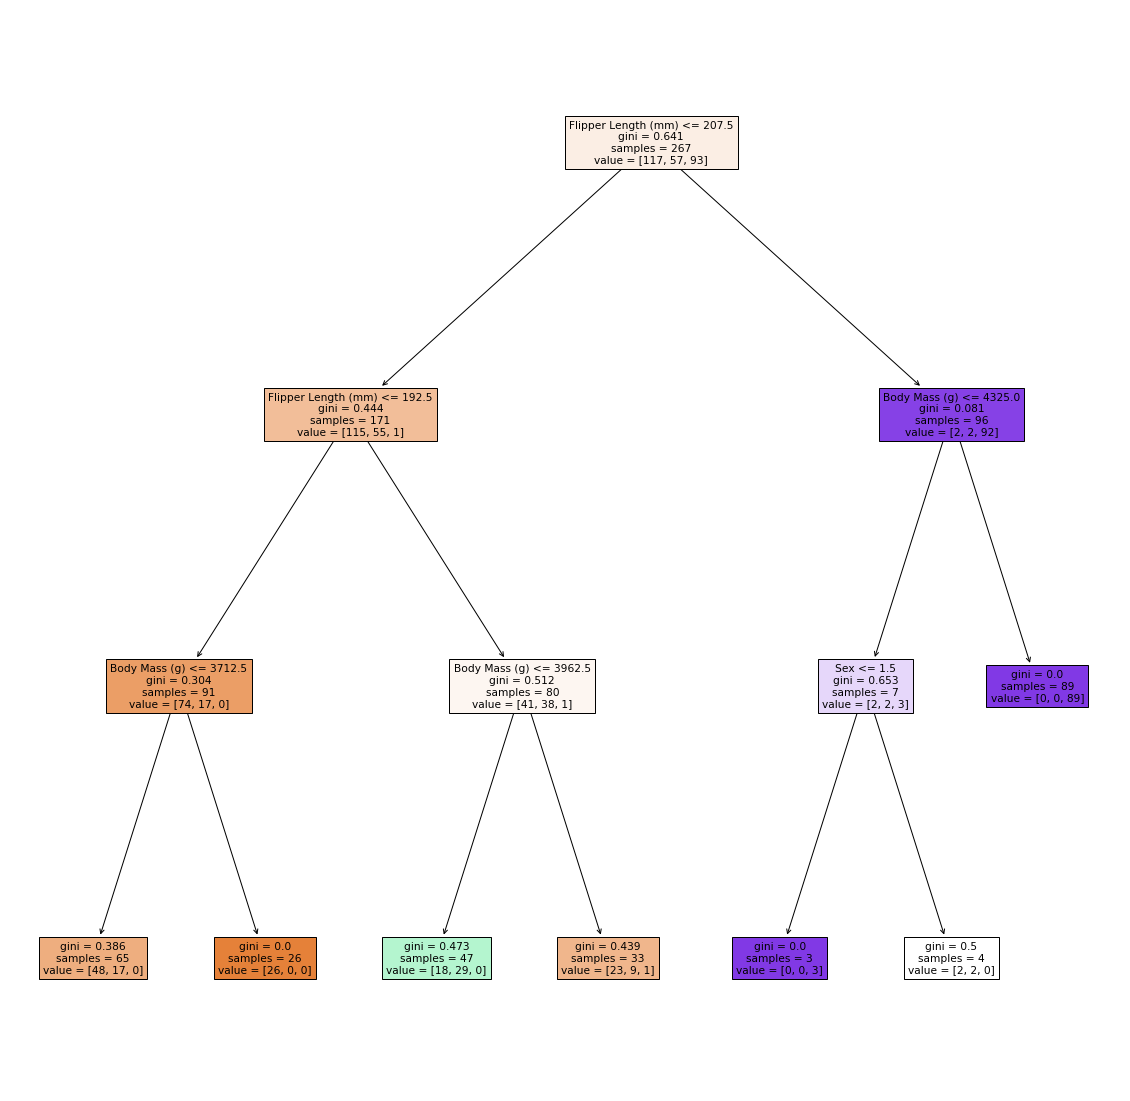

In [41]:
fig, ax = plt.subplots(1, figsize = (20, 20))
p = tree.plot_tree(T, filled = True, feature_names = labels)

### §3. Cross-validation

In [44]:
str(1)

'1'

Now estimate the optimal tree depth using cross-validation, and plot the results, as follows.

Make an empty plot. The x-axis will be the tree depth, and the y-axis will be the cross-validation score. Label your axes.

Make a `for` loop that will test a particular tree depth, between 1 and 30. On each iteration, train a decision tree model of the given depth and calculate its cross-validation score. Plot the depth and the score in your scatterplot. Then compare your score to the best score you have so far, and update the best score and best max depth if the new score is better.

[Text(0.5, 1.0, 'ML: Finding best depth for model is: 5 with a score of: 0.8084045584045585')]

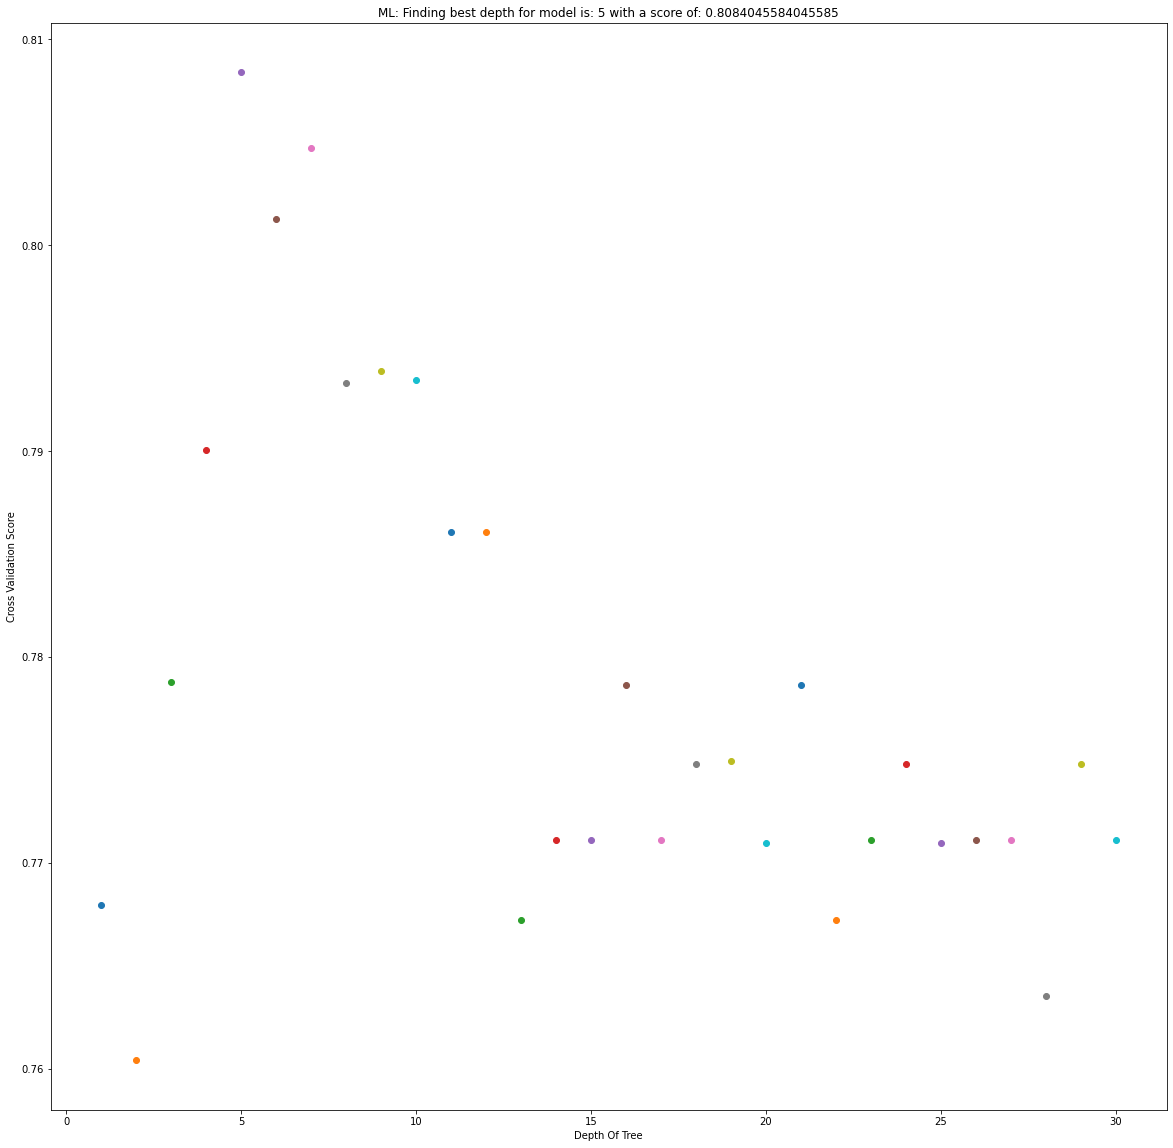

In [46]:
import string
fig, ax = plt.subplots(1, figsize = (20, 20))
best_score = -1000000 #set abritrary number
best_depth = 0
for i in range(1,31):
    T = sklearn.tree.DecisionTreeClassifier(max_depth= i )
    
    cv_score = sklearn.model_selection.cross_val_score(T,X_train, y_train, cv = 10).mean() #set our kfold CV score to 10
    if best_score < cv_score:
        best_score = cv_score
        best_depth = i
    ax.scatter(i,cv_score)
    ax.set(xlabel = "Depth Of Tree", ylabel = "Cross Validation Score")

ax.set( title = "ML: Finding best depth for model is: " +  str(best_depth) + " with a score of: " +  str(best_score))

Lastly, train a decision tree classification model `T` using the best max depth. Score the model against the test data. Print the score and observe the output.

In [48]:
T = sklearn.tree.DecisionTreeClassifier(max_depth= best_depth)
T.fit(X_train,y_train)
sc = T.score(X_test,y_test)
print("Our score using best depth is ", sc)

Our score using best depth is  0.8059701492537313
